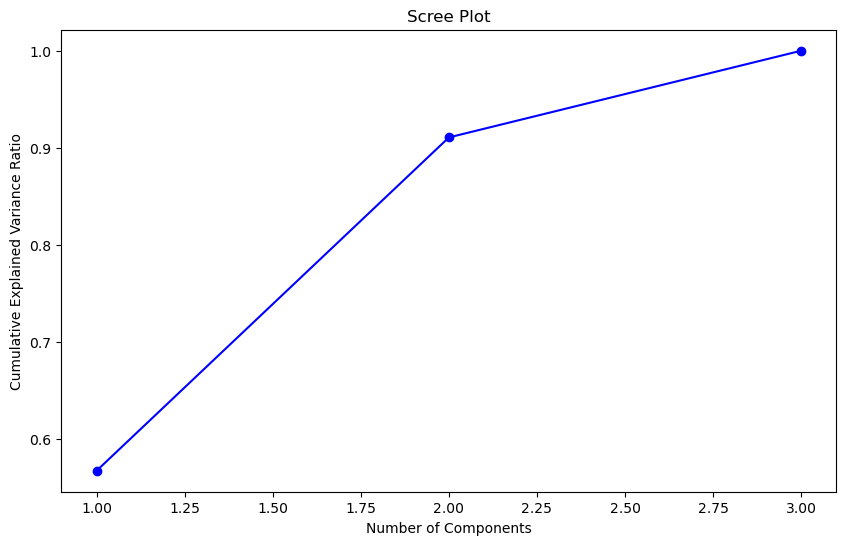

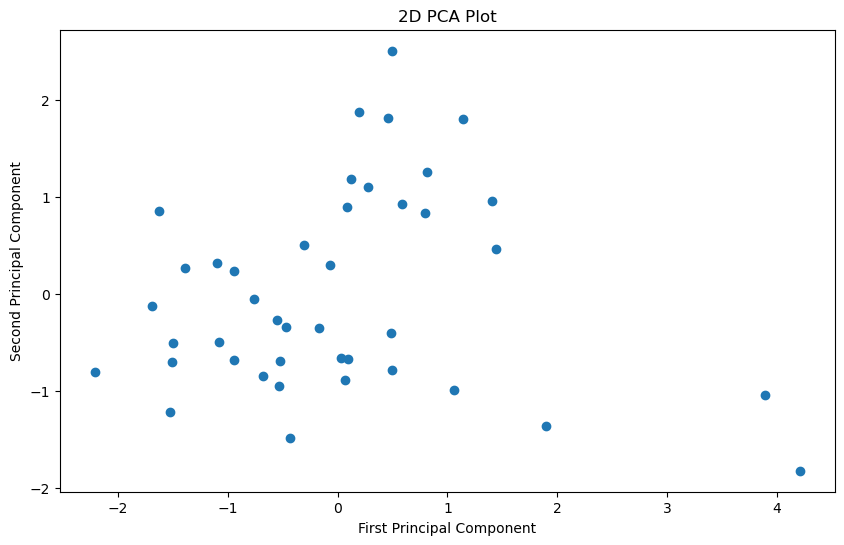

PC1 explained variance ratio: 0.5672
PC2 explained variance ratio: 0.3435
PC3 explained variance ratio: 0.0894


In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the CSV file
file_path = r"C:\Users\Franz\OneDrive\_PhD\Code\MCAM_trackpy_Analysis\Orange_Test_Folder\final_combined_trajectories_filtered_averaged.csv"
df = pd.read_csv(file_path)

# Select the columns for PCA
columns_for_pca = ['size (um)', 'speed', 'particles_in_frame']
X = df[columns_for_pca]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Calculate the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Create a DataFrame with the PCA results
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2', 'PC3'])

# Add the 'x' column to the PCA results DataFrame
pca_df['x'] = df['x']

# Visualize the results
# Scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio.cumsum(), 'bo-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Scree Plot')
plt.show()

# 2D scatter plot of the first two principal components
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('2D PCA Plot')
plt.show()

# Print the explained variance ratio for each component
for i, ratio in enumerate(explained_variance_ratio):
    print(f"PC{i+1} explained variance ratio: {ratio:.4f}")

In [5]:
import numpy as np

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
loadings_df = pd.DataFrame(loadings, columns=[f'PC{i+1}' for i in range(len(columns_for_pca))], index=columns_for_pca)

print(loadings_df)

                         PC1       PC2       PC3
size (um)           0.941450  0.064707  0.365889
speed               0.900969 -0.298521 -0.351469
particles_in_frame -0.212085 -0.980930  0.131096
